# Model inference

Now it's time to check how our model works.

We have some images of handwritten digits in [custom-data](custom-data/)

Let's see which numbers we have (you could also add some numbers you find)

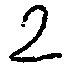

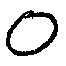

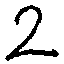

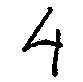

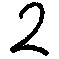

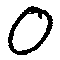

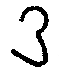

In [1]:
from IPython.display import Image, display

for i in range(7):
    display(Image(filename="custom-data/digit%02d.png" % i))

# Time to check how great our model is

We will be using the previously generated MNIST classes.

First of all, we will have to create a dataClay client and start it.

In [2]:
# ****************************
# Solution
# ****************************
from digits_model.dc_classes import MNIST

from dataclay import Client

client = Client(proxy_host="127.0.0.1")
client.start()
# ****************************

/home/alex/BSC/training-dataclay-2025/venv/lib/python3.10/site-packages/pydantic_settings/sources.py:659: UserWarning: directory "/run/secrets" does not exist
  warnings.warn(f'directory "{path}" does not exist')
INFO:dataclay.client.api:Starting client runtime
INFO:dataclay.client.api:Creating event loop in new thread
INFO:dataclay.client.api:Starting client runtime coroutine in event loop
INFO:dataclay.client.api:Client runtime started


Starting event loop in new thread


INFO:dataclay.backend.client:SSL not configured


## Using the `dry_run` model (bad!)

Now we will check the first model.

First we have to get the object we had persisted in dataClay with the alias you chose (the one we used was "FastMNIST")

In [3]:
# ****************************
# Solution
# ****************************
mnist = MNIST.get_by_alias("FastMNIST")
# ****************************

Let's collect all the handwritten digits into a list. After that we can infere and see what our "bad" model guessed.

In [4]:
from PIL import Image

images = [Image.open("./custom-data/digit%02d.png" % i).convert('1') for i in range(7)]

# ****************************
# Solution
# ****************************
labels, tensors = mnist.inference(images)
labels
# ****************************

[3, 0, 3, 6, 3, 0, 3]

## Using the full model (better!)

Now let's do the same but with the better model.

In [5]:
# ****************************
# Solution
# ****************************
mnist = MNIST.get_by_alias("MyTrainedMNIST")
labels, tensors = mnist.inference(images)
labels
# ****************************

[2, 0, 2, 4, 2, 0, 3]

## Refining the full model

The model can be refined by running more epochs. Try to run a few more epochs and see how the accuracy changes.

All data remains in dataClay and there are no data transfers here. Neat, isn't it?

In [6]:
# ****************************
# Solution
# ****************************
mnist.run_epochs(2)
# ****************************

Starting epoch 5
Train returned loss=0.000447
Test returned accuracy=99.06
Starting epoch 6
Train returned loss=0.003520
Test returned accuracy=99.12


And now let's check the result.

In [7]:
# ****************************
# Solution
# ****************************
labels, tensors = mnist.inference(images)
labels
# ****************************

[2, 0, 2, 4, 2, 0, 3]